## Tarea 6: Reconocimiento facial

Mytzi Yael Munguía Cuatlayotl

El reconocimiento facial, en general tiene 3 etapas:

1. Detección de rostros: Detectar los rostros y sus posiciones en una imagen.
2. Alineación de los rostros: Selección de los rostros y su transformación para homogeneizar el tamaño de las imágenes de rostros
3. Extracción de características

Para facilitar este ejercicio, nosotros sólo nos concentraremos en la tarea de extracción de características. Es decir, nuestra red sólo será alimentada con fotos de rostros.


**Primero importamos los datos de CelebA desde el sitio web oficial**

In [14]:
import urllib.request
import os

celeba_url = "https://www.dropbox.com/s/l4g1ydigqobfprf/CelebA_Align.zip?dl=1"
download_path = "celeba.zip"

urllib.request.urlretrieve(celeba_url, download_path)


('celeba.zip', <http.client.HTTPMessage at 0x188b9d83f70>)

**Descomprimimos los datos, ya que el arcvhivo que se descarga es .zip**

In [12]:
import zipfile
print(f"Ruta del archivo ZIP: {download_path}")

Ruta del archivo ZIP: celeba.zip


In [16]:
with zipfile.ZipFile(download_path, 'r') as zip_ref:
    zip_ref.extractall("celeba_dataset")

BadZipFile: File is not a zip file

**No pude encontrar el problema con el método anterior, por lo cual opte por el método proporcionado**

In [1]:
#Importamos las librerias 
import tensorflow as tf
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
np.set_printoptions(precision=4)
# Eliminar el dobel espacio entre algunos datos de la tabla
with open("C:/Users/mytzi/Downloads/list_attr_celeba.txt", 'r') as f:
    print("skipping : " + f.readline())
    print("skipping headers : " + f.readline())
    with open('attr_celeba_prepared.txt' , 'w') as newf:
        for line in f:
            new_line = ' '.join(line.split())
            newf.write(new_line)
            newf.write('\n')
df = pd.read_csv('attr_celeba_prepared.txt', sep=' ', header = None)
print("-----------")
print(df[0].head())
print(df.iloc[:,1:].head())
print("----------")

skipping : 202599

skipping headers : 5_o_Clock_Shadow Arched_Eyebrows Attractive Bags_Under_Eyes Bald Bangs Big_Lips Big_Nose Black_Hair Blond_Hair Blurry Brown_Hair Bushy_Eyebrows Chubby Double_Chin Eyeglasses Goatee Gray_Hair Heavy_Makeup High_Cheekbones Male Mouth_Slightly_Open Mustache Narrow_Eyes No_Beard Oval_Face Pale_Skin Pointy_Nose Receding_Hairline Rosy_Cheeks Sideburns Smiling Straight_Hair Wavy_Hair Wearing_Earrings Wearing_Hat Wearing_Lipstick Wearing_Necklace Wearing_Necktie Young 

-----------
0    000001.jpg
1    000002.jpg
2    000003.jpg
3    000004.jpg
4    000005.jpg
Name: 0, dtype: object
   1   2   3   4   5   6   7   8   9   10  ...  31  32  33  34  35  36  37  \
0  -1   1   1  -1  -1  -1  -1  -1  -1  -1  ...  -1   1   1  -1   1  -1   1   
1  -1  -1  -1   1  -1  -1  -1   1  -1  -1  ...  -1   1  -1  -1  -1  -1  -1   
2  -1  -1  -1  -1  -1  -1   1  -1  -1  -1  ...  -1  -1  -1   1  -1  -1  -1   
3  -1  -1   1  -1  -1  -1  -1  -1  -1  -1  ...  -1  -1   1  -1   1  -

<_ZipDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(40,), dtype=tf.int64, name=None))>
<_MapDataset element_spec=(TensorSpec(shape=(192, 192, 3), dtype=tf.float32, name=None), TensorSpec(shape=(40,), dtype=tf.int64, name=None))>


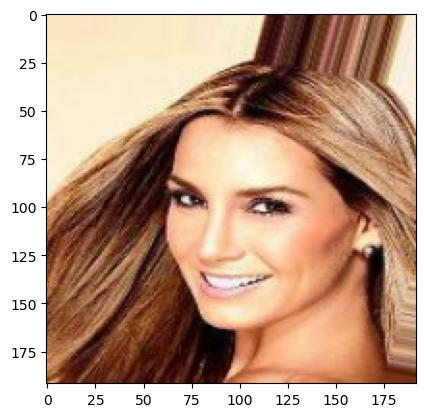

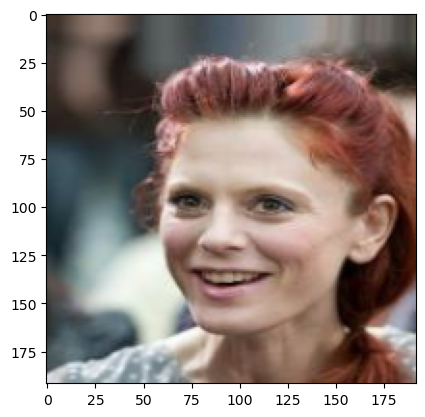

In [14]:
files = tf.data.Dataset.from_tensor_slices(df[0])
attributes = tf.data.Dataset.from_tensor_slices(df.iloc[:,1:].to_numpy())
data = tf.data.Dataset.zip((files, attributes))
print(data)
path_to_images = 'C:/Users/mytzi/Documents/Redes_Neuronales/Curso-Redes-Neuronales/Reconocimiento_facial/img_align_celeba/'
def process_file(file_name, attributes):
    image = tf.io.read_file(path_to_images + file_name)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [192, 192])
    image /= 255.0  #
    return image, attributes
labeled_images = data.map(process_file)
print(labeled_images)
for image, attri in labeled_images.take(2):
    plt.imshow(image)
    plt.show()